# `-` **교호작용** : Machine Learning [3]

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.linear_model 
import sklearn.tree
import sklearn.model_selection

In [2]:
# n = 10000
# Supplement = np.random.choice([True, False], n)
# Exercise = np.random.choice([False, True], n)
# Weight_Loss = np.where(
#     (~Supplement & (~Exercise)),
#     np.random.normal(loc=0, scale=1, size=n),  
#     np.where(
#         (Supplement & (Exercise)),
#         np.random.normal(loc=15.00, scale=1, size=n),
#         np.where(
#             (~Supplement & (Exercise)),
#             np.random.normal(loc=5.00, scale=1, size=n),
#             np.random.normal(loc=0.5, scale=1, size=n)
#         )
#     )
# )
# df = pd.DataFrame({
#     'Supplement': Supplement,
#     'Exercise': Exercise,
#     'Weight_Loss': Weight_Loss
# })
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/weightloss.csv')

In [3]:
df_train.head(5)

,Supplement,Exercise,Weight_Loss
0,False,False,-0.877103
1,True,False,1.604542
2,True,True,13.824148
3,True,True,13.004505
4,True,True,13.701128


In [4]:
df_train.pivot_table(index='Supplement',columns='Exercise',values='Weight_Loss')

Exercise,False,True
Supplement,,
False,0.021673,4.991314
True,0.497573,14.966363


In [15]:
# step1
X = df_train[['Supplement','Exercise']]
y = df_train['Weight_Loss']
# step2 
predictr = sklearn.linear_model.LinearRegression()
# step3
predictr.fit(X,y)
# step4 
df_train['Weight_Loss_hat'] = predictr.predict(X)
#---#
print(f'train score = {predictr.score(X,y):.4f}')

train score = 0.8208


In [16]:
df_train.pivot_table(index='Supplement',columns='Exercise',values='Weight_Loss')

Exercise,False,True
Supplement,,
False,0.021673,4.991314
True,0.497573,14.966363


In [17]:
df_train.pivot_table(index='Supplement',columns='Exercise',values='Weight_Loss_hat')

Exercise,False,True
Supplement,,
False,-2.373106,7.374557
True,2.845934,12.593598


In [19]:
# step1 
#X = df_train.eval('Interaction = Supplement * Exercise')[['Supplement','Exercise','Interaction']]
#y = df_train['Weight_Loss']
# step2 
#predictr = sklearn.linear_model.LinearRegression()
# step3 
#predictr.fit(X,y)
# step4 -- pass 
#df_train['Weight_Loss_hat'] = predictr.predict(X)
#---#
#print(f'train score = {predictr.score(X,y):.4f}')

In [20]:
df_train.pivot_table(index='Supplement',columns='Exercise',values='Weight_Loss_hat')

Exercise,False,True
Supplement,,
False,-2.373106,7.374557
True,2.845934,12.593598


In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.linear_model 
import sklearn.tree

In [22]:
# [아이스크림 교호작용]

In [23]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
choco = 40 + temp * 2.0 + np.random.randn(100)*3
vanilla = 60 + temp * 5.0 + np.random.randn(100)*3
df1 = pd.DataFrame({'temp':temp,'sales':choco}).assign(type='choco')
df2 = pd.DataFrame({'temp':temp,'sales':vanilla}).assign(type='vanilla')
df_train = pd.concat([df1,df2])
df_train

,temp,sales,type
0,-4.1,32.950261,choco
1,-3.7,35.852524,choco
2,-3.0,37.428335,choco
3,-1.3,38.323681,choco
4,-0.5,39.713362,choco
...,...,...,...
95,12.4,119.708075,vanilla
96,13.4,129.300464,vanilla
97,14.7,136.596568,vanilla
98,15.0,136.213140,vanilla


In [24]:
# step1
X = pd.get_dummies(df_train[['temp','type']],drop_first=True)
y = df_train['sales']
# step2 
predictr = sklearn.linear_model.LinearRegression()
# step3
predictr.fit(X,y)
# step4 
df_train['sales_hat'] = predictr.predict(X)
#---#
f'train score = {predictr.score(X,y):.4f}'

'train score = 0.9250'

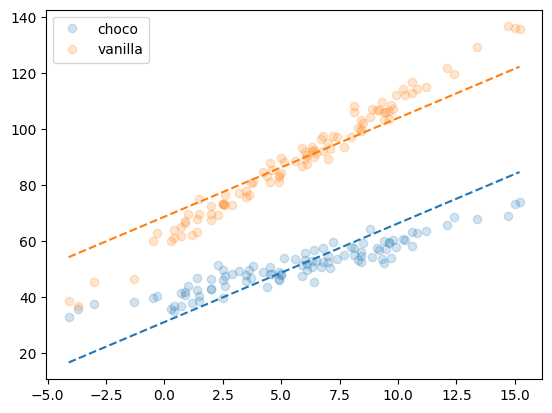

In [25]:
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales[df_train.type=='choco'],'o',alpha=0.2,label='choco')
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales_hat[df_train.type=='choco'],'--',color='C0')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales[df_train.type=='vanilla'],'o',alpha=0.2,label='vanilla')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales_hat[df_train.type=='vanilla'],'--',color='C1')
plt.legend()

In [26]:
# step1
X = pd.get_dummies(df_train[['temp','type']],drop_first=True)
y = df_train['sales']
# step2 
predictr = sklearn.tree.DecisionTreeRegressor()
# step3
predictr.fit(X,y)
# step4 
df_train['sales_hat'] = predictr.predict(X)
#---#
f'train score = {predictr.score(X,y):.4f}'

'train score = 0.9964'

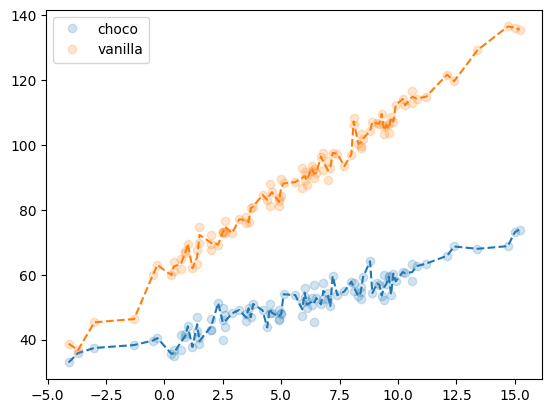

In [27]:
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales[df_train.type=='choco'],'o',alpha=0.2,label='choco')
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales_hat[df_train.type=='choco'],'--',color='C0')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales[df_train.type=='vanilla'],'o',alpha=0.2,label='vanilla')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales_hat[df_train.type=='vanilla'],'--',color='C1')
plt.legend()

# DecisionTree 로 Regression 시키면 된다.
##### `-` 다 선을 그은것같지만몇개는 선에 영향가지않음.
##### - 회귀분류를 잘하는 하나의 기술이라 볼 수 있다.

In [28]:
# 교호작용 - 운동과 보충제

In [32]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/weightloss.csv')
df_train.head(4)

,Supplement,Exercise,Weight_Loss
0,False,False,-0.877103
1,True,False,1.604542
2,True,True,13.824148
3,True,True,13.004505


In [33]:
df_train.pivot_table(index='Supplement',columns='Exercise',values='Weight_Loss')

Exercise,False,True
Supplement,,
False,0.021673,4.991314
True,0.497573,14.966363


In [34]:
# step 1
X,y = df_train[['Supplement','Exercise']], df_train['Weight_Loss']
# step 2 
predictr = sklearn.linear_model.LinearRegression()
# step 3 
predictr.fit(X,y)
# step 4 
df_train['Weight_Loss_hat'] = predictr.predict(X)

In [35]:
df_train.pivot_table(index='Supplement',columns='Exercise',values='Weight_Loss_hat')

Exercise,False,True
Supplement,,
False,-2.373106,7.374557
True,2.845934,12.593598


In [36]:
# step 1
X,y = df_train[['Supplement','Exercise']], df_train['Weight_Loss']
# step 2 
predictr = sklearn.tree.DecisionTreeRegressor()
# step 3 
predictr.fit(X,y)
# step 4 
df_train['Weight_Loss_hat'] = predictr.predict(X)

In [37]:
df_train.pivot_table(index='Supplement',columns='Exercise',values='Weight_Loss')

Exercise,False,True
Supplement,,
False,0.021673,4.991314
True,0.497573,14.966363


In [38]:
# 결론 : 운동안하면 보충제먹어도 똑같다.

### `!` 취업 다중공선성 / 의사결정나무

##### '-' 다중공선성 해결가능

In [39]:
np.random.seed(43052)
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)

In [41]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X,y = df_train.loc[:,'gpa':],df_train['employment_score']
XX,yy = df_test.loc[:,'gpa':],df_test['employment_score']

`-` 의사결정나무

In [42]:
## step1 -- pass 
## step2 
predictr = sklearn.tree.DecisionTreeRegressor(random_state=42)
## step3 
predictr.fit(X,y)
## step4
df_train['employment_score_hat'] = predictr.predict(X)
df_test['employment_score_hat'] = predictr.predict(XX)
#---#
print(f'train score: {predictr.score(X,y):.4f}')
print(f'test score: {predictr.score(XX,yy):.4f}')

train score: 1.0000
test score: 0.8300


- train 은 오버피팅인데 test도 나쁘지않은데? 굿굿

### `-` Lasso 로해볼까?

In [47]:
## step1 -- pass 
## step2 
predictr = sklearn.linear_model.LassoCV()
## step3 
predictr.fit(X,y)
## step4
df_train['employment_score_hat'] = predictr.predict(X);
df_test['employment_score_hat'] = predictr.predict(XX);
#---#
print(f'train score: {predictr.score(X,y):.4f}')
print(f'test score: {predictr.score(XX,yy):.4f}')

TypeError: LassoCV.__init__() got an unexpected keyword argument 'verbosity'

## `-` Lasso 도 좋지만 의사결정나무랑 비슷

# 다중공선성에 대해서

- 변수가 많을 수록 tree ,ridge , lasso 들은 어떻게 변할까?

`-` 정답 : ridge,lasso 는 정확도가 계속 낮아지는것에 반면에 
 , tree 모형은 처음부터 끝까지 비슷하게 유지된다.(tree 굿)

In [48]:
def anal(df,predictr):
    df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)
    X,y = df_train.drop(['employment'],axis=1), df_train['employment']
    XX,yy = df_test.drop(['employment'],axis=1), df_test['employment']
    ## step1 -- pass
    ## step2 -- pass 
    ## step3 
    predictr.fit(X,y)
    ## step4 -- pass 
    #--#
    return predictr.score(X,y),predictr.score(XX,yy)

In [53]:
predictr = sklearn.tree.DecisionTreeClassifier()

In [59]:

anal(df,predictr)

(1.0, 0.7457142857142857)

In [74]:
#같은지 실험
n_balance_lst = range(0,10000,50)
predictrs = [sklearn.tree.DecisionTreeClassifier(),
             sklearn.linear_model.LogisticRegressionCV(penalty='l2'),
             sklearn.linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear')]


In [62]:
def generating_df(n_balance):
    df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
    df_balance = pd.DataFrame((np.random.randn(500,n_balance)).reshape(500,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)])
    return pd.concat([df,df_balance],axis=1)

In [63]:
lst = [[anal(generating_df(n_balance),predictr) for predictr in predictrs] for n_balance in n_balance_lst]

/root/anaconda3/envs/hf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/anaconda3/envs/hf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [75]:
arr = np.array(lst)
tr = arr[:,:,0]
tst = arr[:,:,1]


In [77]:
df1= pd.DataFrame(tr,columns=['tree','ridge','lasso']).eval('dataset = "train"').eval('n_balance = @n_balance_lst')


ValueError: data type must provide an itemsize